In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
X_train = X_train.reshape(60000, 784) / 255.0
X_test = X_test.reshape(10000, 784) / 255.0

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=(784,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [9]:
history = model.fit(X_train, y_train, epochs=4, validation_data=(X_train, y_train))

Epoch 1/4
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5697 - accuracy: 0.8536 - val_loss: 0.3093 - val_accuracy: 0.9133
Epoch 2/4
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2773 - accuracy: 0.9213 - val_loss: 0.2442 - val_accuracy: 0.9315
Epoch 3/4
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2245 - accuracy: 0.9363 - val_loss: 0.2008 - val_accuracy: 0.9435
Epoch 4/4
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1909 - accuracy: 0.9466 - val_loss: 0.1716 - val_accuracy: 0.9516


In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1739 - accuracy: 0.9490


[0.17388373613357544, 0.9490000009536743]

In [11]:
model.evaluate(X_train, y_train)


1875/1875 [==============================] - 6s 3ms/step - loss: 0.1716 - accuracy: 0.9516


[0.17164038121700287, 0.9515833258628845]

In [17]:
X_new = X_test[:7]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 36ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.98, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.01, 0.  , 0.  , 0.05],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.01, 0.01]],
      dtype=float32)

In [29]:
img = Image.open("One.png").convert("L")
img = np.array(img.resize((28, 28)))
img = img.reshape(1, 784) / 255.0

In [27]:
proba = model.predict(img)
digit = np.argmax(proba)

1/1 [==============================] - 0s 24ms/step


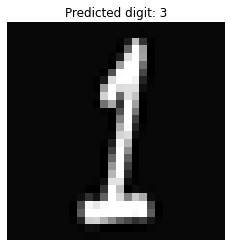

In [30]:

plt.imshow(img.reshape(28, 28), cmap="binary")
plt.axis("off")
plt.title(f"Predicted digit: {digit}")
plt.show()